In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import os
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]


# Graphing definition

In [24]:
def graph_df(data_frame:pd.DataFrame,begin_index=0,end_index=None):
    if end_index:
        column_name =list(data_frame.columns )[begin_index:end_index]
    else:
        column_name =list(data_frame.columns )[begin_index:]
    fig, ax = plt.subplots()
    x = np.arange(0, len(data_frame), step=1)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    ax.set_title(t)
    plt.tight_layout()


# Graphing Propogation

,0.4,0.4.1,0.4.2,0.4.3,0.4.4,0.4.5,0.4.6,0.4.7,0.4.8,0.4.9
0,4.980000e-01,4.980000e-01,4.980000e-01,4.980000e-01,4.980000e-01,4.980000e-01,4.980000e-01,4.980000e-01,4.980000e-01,4.980000e-01
1,6.204990e-01,6.079990e-01,5.986240e-01,5.915930e-01,5.863190e-01,5.823640e-01,5.793980e-01,5.771730e-01,5.755040e-01,5.742530e-01
2,7.650580e-01,7.382800e-01,7.180670e-01,7.028390e-01,6.913810e-01,6.827660e-01,6.762940e-01,6.714340e-01,6.677850e-01,6.650470e-01
3,9.091280e-01,8.723550e-01,8.436870e-01,8.216030e-01,8.047240e-01,7.918920e-01,7.821740e-01,7.748330e-01,7.692980e-01,7.651310e-01
4,1.006500e+00,9.737100e-01,9.458350e-01,9.230510e-01,9.049010e-01,8.906910e-01,8.797000e-01,8.712690e-01,8.648410e-01,8.599610e-01
...,...,...,...,...,...,...,...,...,...,...
995,-1.617800e-08,-1.266020e-08,-1.121670e-08,-1.318950e-08,-5.182390e-10,-3.548900e-10,-2.476620e-10,-1.756330e-10,-1.261720e-10,-9.156360e-11
996,-1.540360e-08,-1.205420e-08,-1.067980e-08,-1.255820e-08,-4.934330e-10,-3.379030e-10,-2.358070e-10,-1.672260e-10,-1.201320e-10,-8.718090e-11
997,-1.466630e-08,-1.147720e-08,-1.016860e-08,-1.195710e-08,-4.698150e-10,-3.217290e-10,-2.245200e-10,-1.592210e-10,-1.143820e-10,-8.300790e-11
998,-1.396430e-08,-1.092790e-08,-9.681860e-09,-1.138480e-08,-4.473270e-10,-3.063290e-10,-2.137730e-10,-1.516000e-10,-1.089070e-10,-7.903470e-11


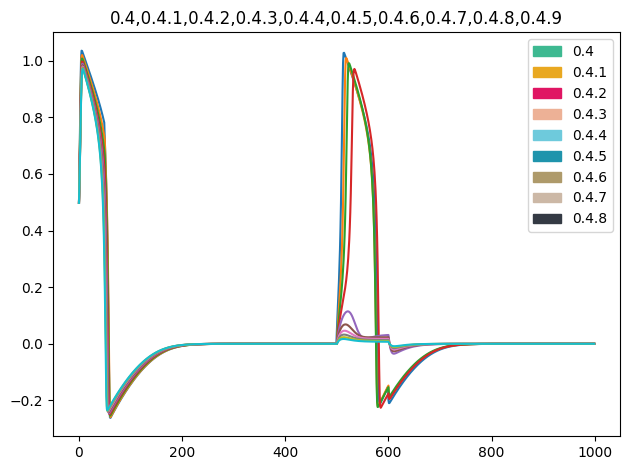

In [25]:
propogate_ap_df = pd.DataFrame(pd.read_csv("../data_files/reduced2dV_output.csv"))
display(propogate_ap_df)
graph_df(propogate_ap_df,0,len(propogate_ap_df))


In [37]:
def graph_time_frame(data_frame,time_frame):
    row1 = data_frame.iloc[time_frame]
    x = np.arange(0,10,step = 1)
    fig, ax = plt.subplots()
    ax.plot(x,row1)
    ax.set_xlabel("axon location")
    ax.set_ylabel("V")
    ax.set_title(f"time: {time_frame}")
    ax.set_ylim(-0.5,1.2)
    plt.plot()
    plt.tight_layout()
    plt.savefig(f"../graphs/2D/{time_frame}")
    plt.close() 

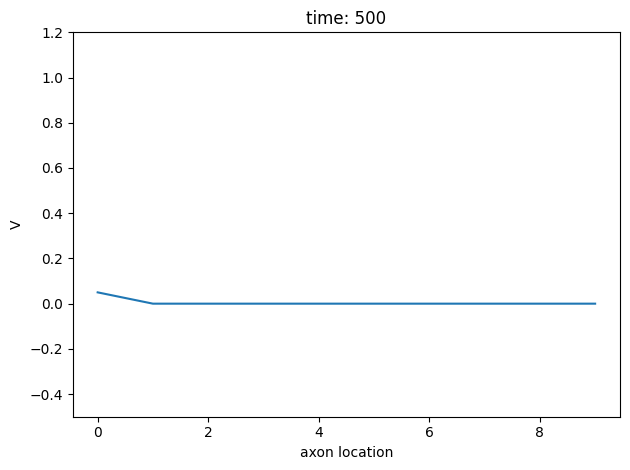

In [35]:
graph_time_frame(propogate_ap_df,500)

In [38]:
for i in range(len(propogate_ap_df)): 
    graph_time_frame(propogate_ap_df,i)

In [39]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")

os.system(
                "convert -delay 5 -loop 0 $(ls -1 ../graphs/2D/*.png | sort -V) -quality 95 ../vid/{}_{}.mp4".format("propagation",current_time))

0

In [42]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 15:42:52
